# The Temperature Forecast Project using ML

**Prepared for FLIP ROBO by Olumide Ikumapayi-DS2306**

# About The Temperature Forecast Dataset

The purpose of this project is to correct bias in the forecasted maximum and minimum air temperatures for the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. The data used includes summer data from 2013 to 2017. The input data primarily consists of the LDAPS model's next-day forecast data, current-day maximum and minimum temperatures measured on-site, and additional geographic variables. The two outputs in this data are the next-day maximum and minimum air temperatures. Hindcast validation was performed for the period spanning from 2015 to 2017.

Please check the following link for more information regarding the dataset: https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

The flow of this machine learning exercise is as follows:

1. [Import Necessary Libraries](#Import-Necessary-Libraries)
2. [Importing the Global Power Plant Dataset](#Importing-the-Global-Power-Plant-Dataset)
3. [Exploratory Data Analysis(EDA) & Visualization](#Exploratory-Data-Analysis-(EDA)-&-Visualization))
4. [Description-of-Dataset](#Description-of-Dataset)
5. [Feature Engineering And Data Preprocessing](#Feature-Engineering-And-Data-Preprocessing)
6. [The Machine Learning Model Training Evaluation and Predictions](#The-Machine-Learning-Model-Training-Evaluation-and-Predictions)
  * i.  [Random Forest Regressor](#Random-Forest-Regressor)
  * ii. [Linear regression](#Linear-Regression)
  * iii.[Support Vector Machine(SVM) Regressor](#support-Vector-Machine-(SVM)-Regressor)
  * iv. [Gradient Boosting Regressor](#Gradien-Boosting-Regressor)
  *  v.  [Lasso Regression](#Lasso-Regression)
  * vi. [Ridge Regressor](#Ridge-Regressor)
  
   
 7. [Summary and Conclusion](#Summary-and-Coclusion)

# Import Necessary Libraries

Importing all necessary libraries for data manipulation, visualization, and machine learning(ML).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Loading the Temperature Forecast Dataset

In [2]:
url = "https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv"
df = pd.read_csv(url)

In [3]:
# Display the first few rows of the dataset
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


# Exploratory Data Analysis(EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
#Checking the dimension of the dataset
df.shape

(7752, 25)

This set of data comprises 7752 rows and 25 columns, with one column designated as the target variable and the remaining 24 columns serving as independent variables.

**Temperature Forecast Project Description:**

The primary objective of this project is to create machine learning models that can accurately predict the maximum and minimum air temperatures for the following day in Seoul, South Korea. The dataset used for this project consists of summer data from 2013 to 2017 and is derived from the LDAPS model utilized by the Korea Meteorological Administration.

**Independent Variables**:

1. **Station**:Used weather station number (categorical)
2. **Date**:Present day (date)
3. **Present_Tmax**:Maximum air temperature between 0 and 21 h on the present day (Â°C)
4. **Present_Tmin**:Minimum air temperature between 0 and 21 h on the present day (Â°C)
5. **LDAPS_RHmin**:LDAPS model forecast of next-day minimum relative humidity (%)
6. **LDAPS_RHmax**:LDAPS model forecast of next-day maximum relative humidity (%)
7. **LDAPS_Tmax_lapse**:LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C)
8. **LDAPS_Tmin_lapse**: LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C)
9. **LDAPS_WS**: LDAPS model forecast of next-day average wind speed (m/s)
10. **LDAPS_LH**: LDAPS model forecast of next-day average latent heat flux (W/m2)
11. **LDAPS_CC1 to LDAPS_CC4**: LDAPS model forecast of next-day split average cloud cover for four 6-hour periods
12. **LDAPS_PPT1 to LDAPS_PPT4**: LDAPS model forecast of next-day split average precipitation for four 6-hour periods
13. **Latitude (lat)**: Latitude (Â°)
14. **Longitude (lon)**: Longitude (Â°)
15. **DEM**: Elevation (m)
16. **Slope**: Slope (Â°)
17. **Solar radiation**: Daily incoming solar radiation (wh/m2)

**Dependent Variables**:

1. **Next_Tmax**: The next-day maximum air temperature (Â°C)
2. **Next_Tmin**: The next-day minimum air temperature (Â°C)

The objective of this project is to construct distinct machine learning models using the given independent variables in order to forecast the maximum and minimum air temperatures in Seoul for the following day.These predictions will have significant applications in agriculture, urban planning, and weather monitoring, as they offer valuable insights into temperature changes.It  will also help improve the precision and dependability of the temperature predictions.

In [7]:
# Lets check the null values 
print(df.isnull().sum())
print(df.shape)

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64
(7752, 25)


There are missing values in the Data Set

In [8]:
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.shape)

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64
(7588, 25)


Missing values have now been removed

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


There two(2) different types of data(object and float64) present in the dataset.

In [10]:
# Lets check the dimension of the dataset again
df.shape

(7588, 25)

<AxesSubplot:>

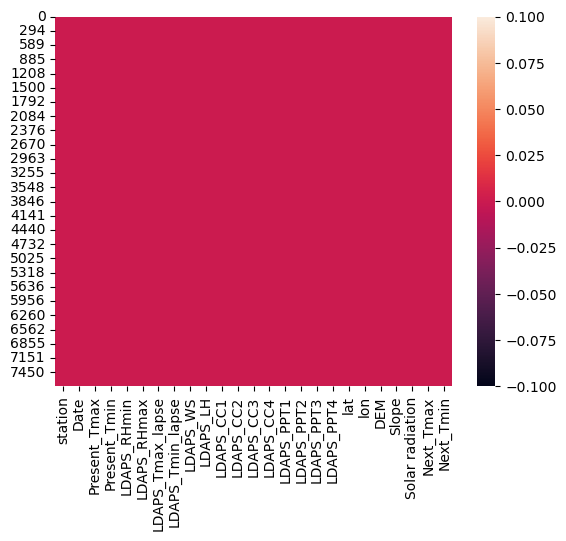

In [11]:
# Lets visualize it using heatmap
sns.heatmap(df.isnull())

In [12]:
# Checking the columns of dataset
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [13]:
df.columns.tolist()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [14]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [15]:
# Checking number of unique values in each column
df.nunique().to_frame("No.of unique values")

,No.of unique values
station,25
Date,307
Present_Tmax,167
Present_Tmin,155
LDAPS_RHmin,7585
LDAPS_RHmax,7577
LDAPS_Tmax_lapse,7588
LDAPS_Tmin_lapse,7588
LDAPS_WS,7588
LDAPS_LH,7588


Four columns ('LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS' and 'LDAPS_LH') serves as unique identifiers for all 7588 rows while additional four columns ('station','lon','DEM' and 'Slope')	were observed to exhibit a consistent value of "25" across all 7588 rows.These Eight columns will be excluded from consideration as they lack predictive value in assessing attrition. This elimination will facilitate the proper use of categorical variables in our modeling process.

In [16]:
# Dropping all Eight columns
columns_to_drop = ['LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH','station','lon','DEM','Slope']
df = df.drop(columns=columns_to_drop)

In [17]:
# Converting the datatype of Date column from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             7588 non-null   datetime64[ns]
 1   Present_Tmax     7588 non-null   float64       
 2   Present_Tmin     7588 non-null   float64       
 3   LDAPS_RHmin      7588 non-null   float64       
 4   LDAPS_RHmax      7588 non-null   float64       
 5   LDAPS_CC1        7588 non-null   float64       
 6   LDAPS_CC2        7588 non-null   float64       
 7   LDAPS_CC3        7588 non-null   float64       
 8   LDAPS_CC4        7588 non-null   float64       
 9   LDAPS_PPT1       7588 non-null   float64       
 10  LDAPS_PPT2       7588 non-null   float64       
 11  LDAPS_PPT3       7588 non-null   float64       
 12  LDAPS_PPT4       7588 non-null   float64       
 13  lat              7588 non-null   float64       
 14  Solar radiation  7588 non-null   float64

In [18]:
# Setting date as DataFrame Index
df.set_index('Date', inplace=True)

In [19]:
df

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,
2013-06-30,28.7,21.4,58.255688,91.116364,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,5992.895996,29.1,21.2
2013-06-30,31.9,21.6,52.263397,90.604721,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,5869.312500,30.5,22.5
2013-06-30,31.6,23.3,48.690479,83.973587,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,5863.555664,31.1,23.9
2013-06-30,32.0,23.4,58.239788,96.483688,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,5856.964844,31.7,24.3
2013-06-30,31.4,21.9,56.174095,90.155128,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-30,23.1,17.8,24.688997,78.261383,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,4456.024414,27.6,17.7
2017-08-30,22.5,17.4,30.094858,83.690018,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,4441.803711,28.0,17.1
2017-08-30,23.3,17.1,26.741310,78.869858,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,4443.313965,28.3,18.1


In [20]:
# Checking number of unique values in each column
df.nunique().to_frame("No.of unique values")

,No.of unique values
Present_Tmax,167
Present_Tmin,155
LDAPS_RHmin,7585
LDAPS_RHmax,7577
LDAPS_CC1,7485
LDAPS_CC2,7496
LDAPS_CC3,7512
LDAPS_CC4,7438
LDAPS_PPT1,2779
LDAPS_PPT2,2479


In [21]:
# Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("n")

31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: Present_Tmax, Length: 167, dtype: int64
n
24.0    160
23.8    153
23.5    143
23.1    143
23.3    140
       ... 
14.3      1
29.9      1
29.7      1
29.1      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64
n
77.030350    2
51.810596    2
71.658089    2
58.255688    1
46.582764    1
            ..
58.950947    1
58.566174    1
59.790348    1
51.062355    1
22.933014    1
Name: LDAPS_RHmin, Length: 7585, dtype: int64
n
92.531029    2
88.876610    2
85.863731    2
96.525200    2
96.058418    2
            ..
84.423607    1
81.810715    1
92.785057    1
91.507935    1
77.243744    1
Name: LDAPS_RHmax, Length: 7577, dtype: int64
n
0.000000    104
0.233947      1
0.280824      1
0.347618      1
0.372637      1
           ... 
0.011633      1
0.020428      1
0.021683      1
0.008280      1
0.048954      1
Name: LDAPS_CC1, Length: 7485, dtype: 

In [22]:
df.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,
2013-06-30,28.7,21.4,58.255688,91.116364,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,5992.895996,29.1,21.2
2013-06-30,31.9,21.6,52.263397,90.604721,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,5869.312500,30.5,22.5
2013-06-30,31.6,23.3,48.690479,83.973587,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,5863.555664,31.1,23.9
2013-06-30,32.0,23.4,58.239788,96.483688,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,5856.964844,31.7,24.3
2013-06-30,31.4,21.9,56.174095,90.155128,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,5859.552246,31.2,22.5


In [23]:
# Checking Duplicate values in DataFrame
print("Total Duplicate Rows are ",df.duplicated().sum())

Total Duplicate Rows are  0


**Description fo Dataset**

In [24]:
df.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,29.748366,23.195809,56.724969,88.360823,0.368510,0.355528,0.317546,0.298268,0.589008,0.480738,0.275007,0.265373,37.544792,5343.724208,30.241526,22.910820
std,2.967401,2.400880,14.626559,7.199456,0.262260,0.257922,0.249833,0.253392,1.927577,1.743327,1.146087,1.179661,0.050428,429.782561,3.111807,2.482256
min,20.000000,11.300000,19.794666,58.936283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,4329.520508,17.400000,11.300000
25%,27.800000,21.600000,45.960243,84.203724,0.146546,0.140324,0.100950,0.081495,0.000000,0.000000,0.000000,0.000000,37.510200,5001.485717,28.200000,21.300000
50%,29.900000,23.400000,55.023199,89.784122,0.315706,0.311676,0.261795,0.227459,0.000000,0.000000,0.000000,0.000000,37.550700,5441.987305,30.400000,23.100000
75%,32.000000,24.800000,67.115099,93.742725,0.574174,0.557164,0.496444,0.498127,0.052594,0.017735,0.007855,0.000017,37.577600,5729.485840,32.600000,24.600000
max,37.600000,29.900000,98.524734,100.000153,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,5992.895996,38.900000,29.800000


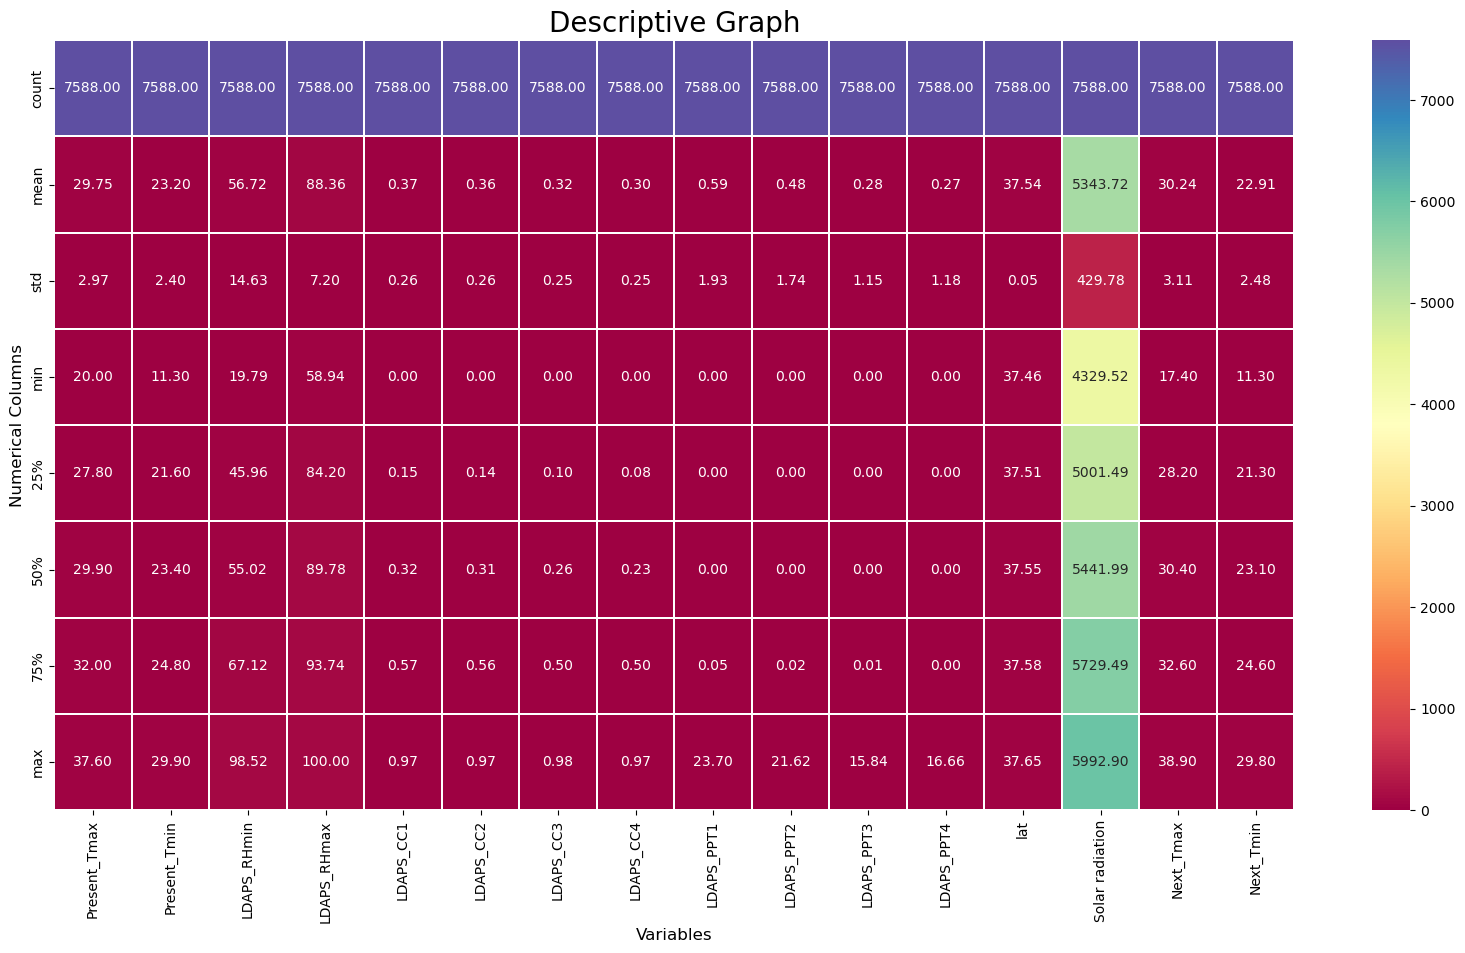

In [25]:
# Lets Visualize the describe using graph
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='white',cmap='Spectral')
plt.xlabel('Variables',fontsize=12)
plt.ylabel('Numerical Columns',fontsize=12)
plt.title('Descriptive Graph' ,fontsize=20)
plt.show()

In [26]:
df.isnull().sum()

Present_Tmax       0
Present_Tmin       0
LDAPS_RHmin        0
LDAPS_RHmax        0
LDAPS_CC1          0
LDAPS_CC2          0
LDAPS_CC3          0
LDAPS_CC4          0
LDAPS_PPT1         0
LDAPS_PPT2         0
LDAPS_PPT3         0
LDAPS_PPT4         0
lat                0
Solar radiation    0
Next_Tmax          0
Next_Tmin          0
dtype: int64

In [27]:
# Separating numerical and categorical columns

#checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical columns:", categorical_col)
print("\n")

#Checking for Numerical column
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!= "object":
        numerical_col.append(i)
print("numerical columns:", numerical_col)

categorical columns: []


numerical columns: ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']


In [28]:
# Checking the correlation between features and the target.
cor = df.corr()
cor

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,Solar radiation,Next_Tmax,Next_Tmin
Present_Tmax,1.000000,0.615208,-0.209059,-0.306943,-0.316333,-0.216976,-0.146391,-0.143069,-0.114917,-0.104779,-0.127248,-0.107295,-0.054134,-0.022114,0.610357,0.621048
Present_Tmin,0.615208,1.000000,0.122200,-0.018576,0.084348,0.090038,-0.004719,-0.046694,0.111577,0.066207,-0.052428,-0.070391,-0.081417,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.209059,0.122200,1.000000,0.578358,0.612831,0.744774,0.688069,0.513937,0.259039,0.389572,0.237512,0.167311,0.085027,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.306943,-0.018576,0.578358,1.000000,0.435937,0.390620,0.224734,0.127242,0.268019,0.227581,0.132436,0.118101,0.194820,0.146622,-0.289788,-0.076415
LDAPS_CC1,-0.316333,0.084348,0.612831,0.435937,1.000000,0.779510,0.516698,0.362670,0.446930,0.389368,0.166763,0.088897,-0.010268,0.218285,-0.459705,-0.012877
LDAPS_CC2,-0.216976,0.090038,0.744774,0.390620,0.779510,1.000000,0.724546,0.527333,0.304442,0.479511,0.238179,0.157194,-0.002642,0.169346,-0.498295,0.030358
LDAPS_CC3,-0.146391,-0.004719,0.688069,0.224734,0.516698,0.724546,1.000000,0.794463,0.154952,0.336254,0.337346,0.303787,0.003827,0.116691,-0.523061,-0.056490
LDAPS_CC4,-0.143069,-0.046694,0.513937,0.127242,0.362670,0.527333,0.794463,1.000000,0.115968,0.286266,0.265709,0.380597,-0.010612,0.114268,-0.454039,-0.086197
LDAPS_PPT1,-0.114917,0.111577,0.259039,0.268019,0.446930,0.304442,0.154952,0.115968,1.000000,0.367922,0.012847,0.004377,-0.005841,0.084804,-0.125954,0.018031
LDAPS_PPT2,-0.104779,0.066207,0.389572,0.227581,0.389368,0.479511,0.336254,0.286266,0.367922,1.000000,0.205285,0.121937,0.015198,0.107620,-0.186722,-0.012462


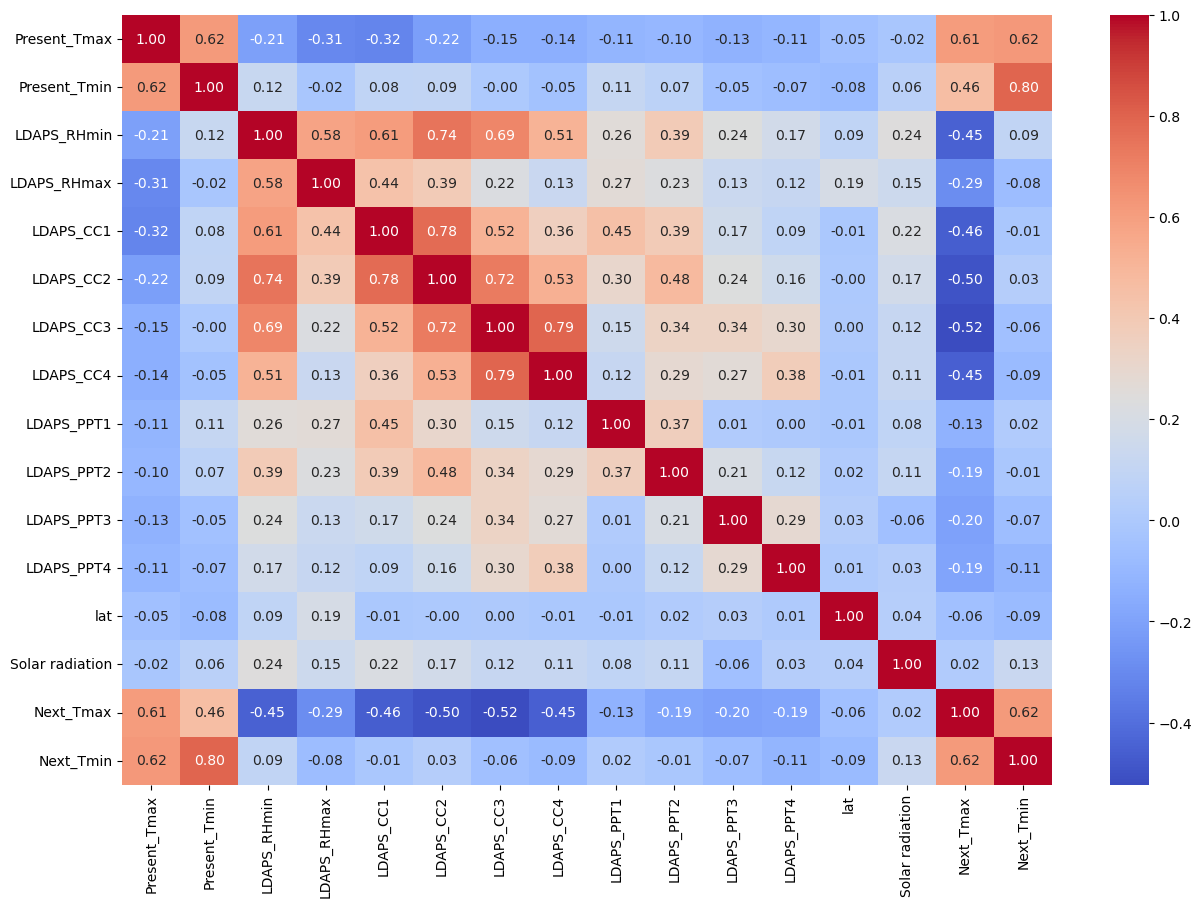

In [29]:
# Visualizing the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

The variables Next_Tmax and Next_Tmin show a positive correlation with the variable Present_Tmax, while they exhibit a negative correlation with the variables 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat' and 'Solar radiation'. In a similar manner, the variable Present_Tmin is positively correlated with the variables 'LDAPS_RHmin', 'LDAPS_CC1', 'LDAPS_CC2','LDAPS_PPT1', 'LDAPS_PPT2'and negatively correlated with the variables  'LDAPS_RHmax',' LDAPS_CC3',' LDAPS_CC4',' LDAPS_PPT3' and  LDAPS_PPT4'.

In [30]:
# Reseting the index to eliminate any potential duplicate labels
df.reset_index(drop=True, inplace=True)

In [31]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'Solar radiation',
       'Next_Tmax', 'Next_Tmin'],
      dtype='object')

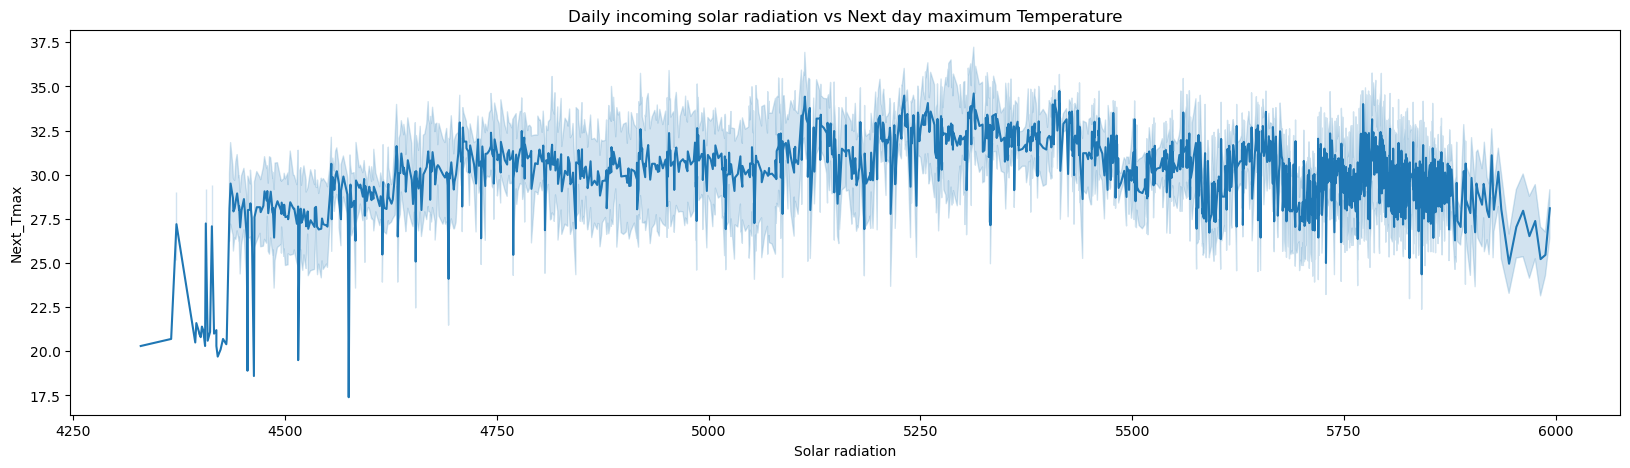

In [32]:
plt.figure(figsize=(20, 5))
plt.title('Daily incoming solar radiation vs Next day maximum Temperature')
sns.lineplot(x='Solar radiation', y='Next_Tmax', data=df)
plt.show()

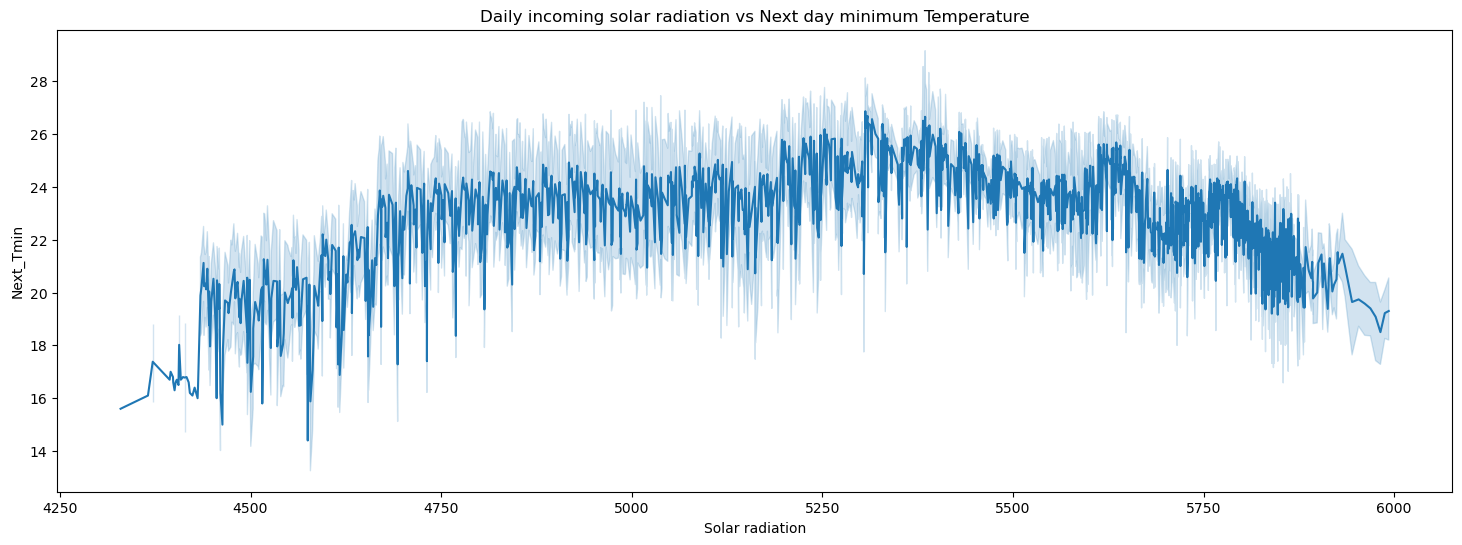

In [33]:
plt.figure(figsize=(18, 6))
plt.title('Daily incoming solar radiation vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation', y='Next_Tmin', data=df)
plt.show()

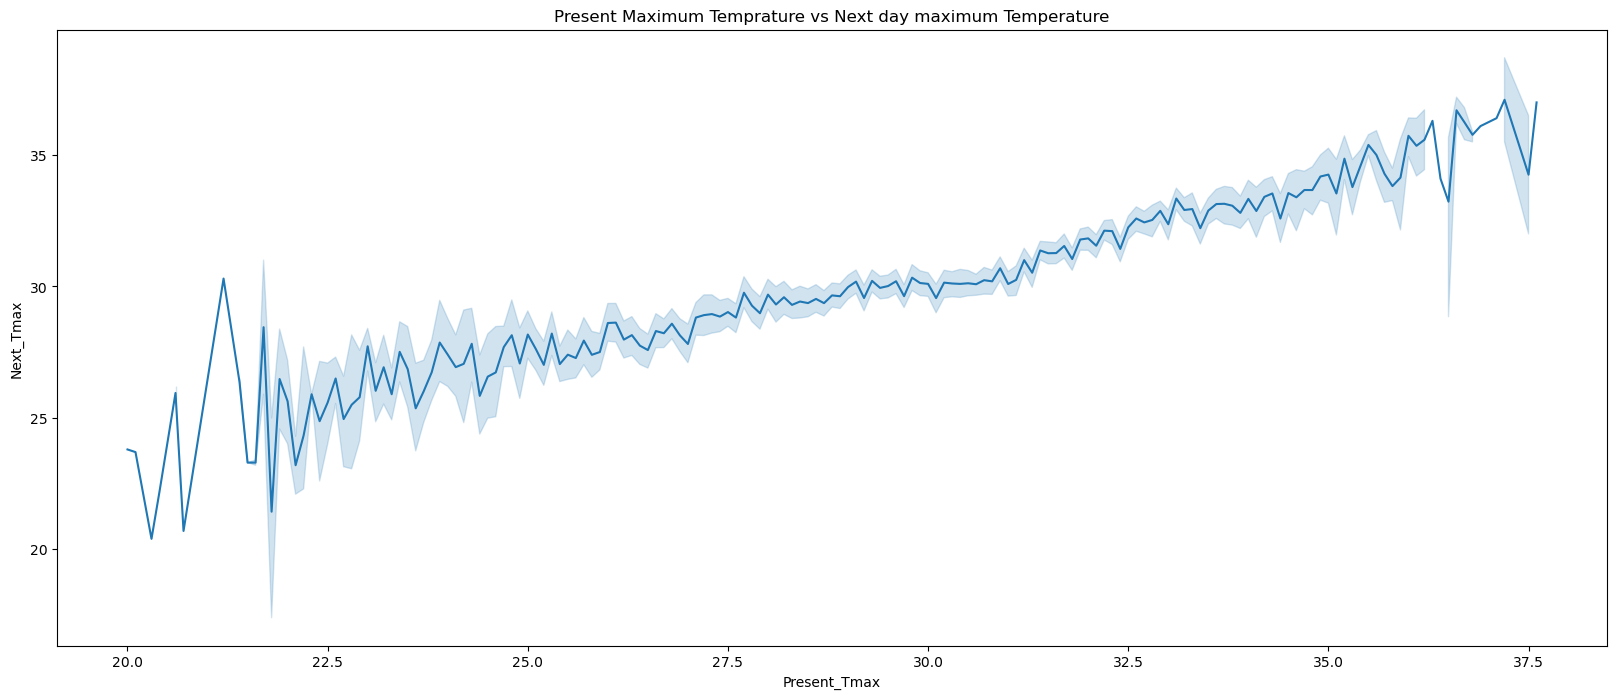

In [34]:
plt.figure(figsize=(20, 8))
plt.title('Present Maximum Temprature vs Next day maximum Temperature')
sns.lineplot(x='Present_Tmax', y='Next_Tmax', data=df)
plt.show()

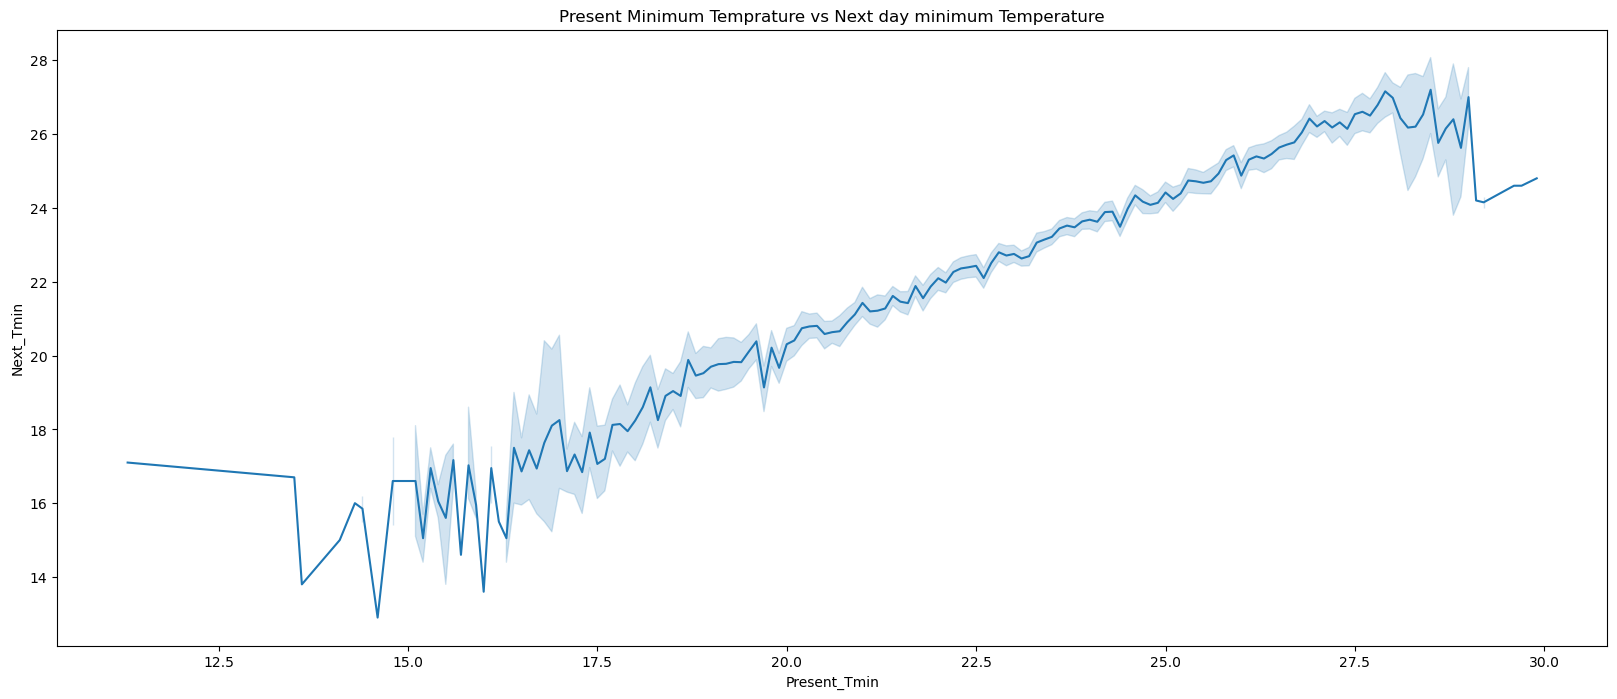

In [35]:
plt.figure(figsize=(20, 8))
plt.title('Present Minimum Temprature vs Next day minimum Temperature')
sns.lineplot(x='Present_Tmin', y='Next_Tmin', data=df)
plt.show()

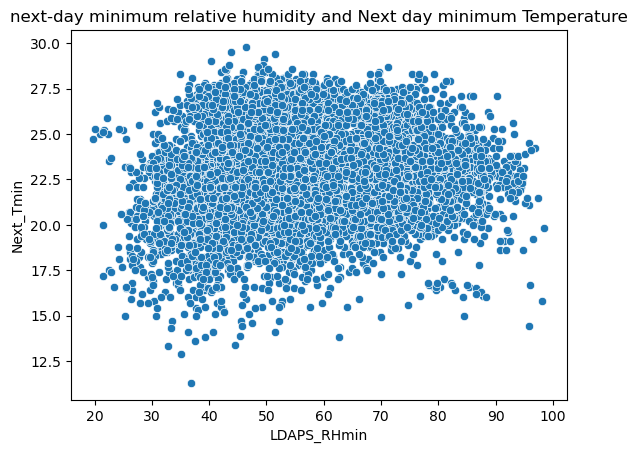

In [36]:
# Comparison between next-day minimum relative humidity and Next day minimum Temperature
plt.title("next-day minimum relative humidity and Next day minimum Temperature")
sns.scatterplot(x = "LDAPS_RHmin", y = "Next_Tmin", data = df)
plt.show()

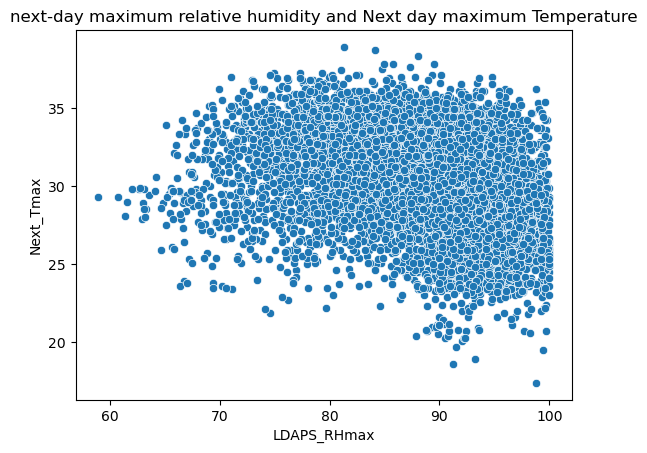

In [37]:
# Comparison between next-day maximum relative humidity and Next day maximum Temperature
plt.title("next-day maximum relative humidity and Next day maximum Temperature")
sns.scatterplot(x = "LDAPS_RHmax", y = "Next_Tmax", data = df)
plt.show()

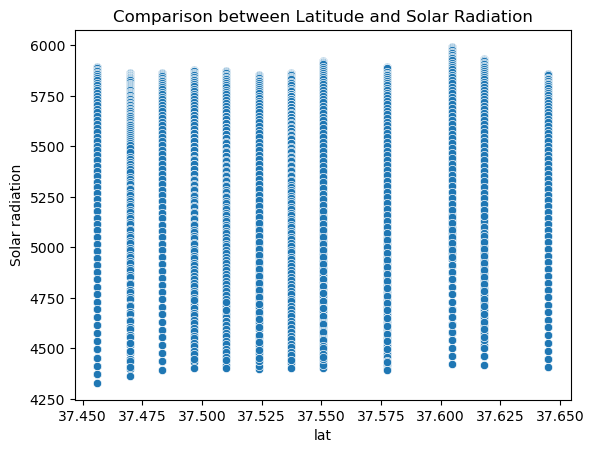

In [38]:
# Comparison between Latitude and Solar Radiation
plt.title("Comparison between Latitude and Solar Radiation")
sns.scatterplot(x = "lat", y = "Solar radiation", data = df)
plt.show()

array([[<AxesSubplot:title={'center':'Present_Tmax'}>,
        <AxesSubplot:title={'center':'Present_Tmin'}>,
        <AxesSubplot:title={'center':'LDAPS_RHmin'}>,
        <AxesSubplot:title={'center':'LDAPS_RHmax'}>],
       [<AxesSubplot:title={'center':'LDAPS_CC1'}>,
        <AxesSubplot:title={'center':'LDAPS_CC2'}>,
        <AxesSubplot:title={'center':'LDAPS_CC3'}>,
        <AxesSubplot:title={'center':'LDAPS_CC4'}>],
       [<AxesSubplot:title={'center':'LDAPS_PPT1'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT2'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT3'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT4'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'Solar radiation'}>,
        <AxesSubplot:title={'center':'Next_Tmax'}>,
        <AxesSubplot:title={'center':'Next_Tmin'}>]], dtype=object)

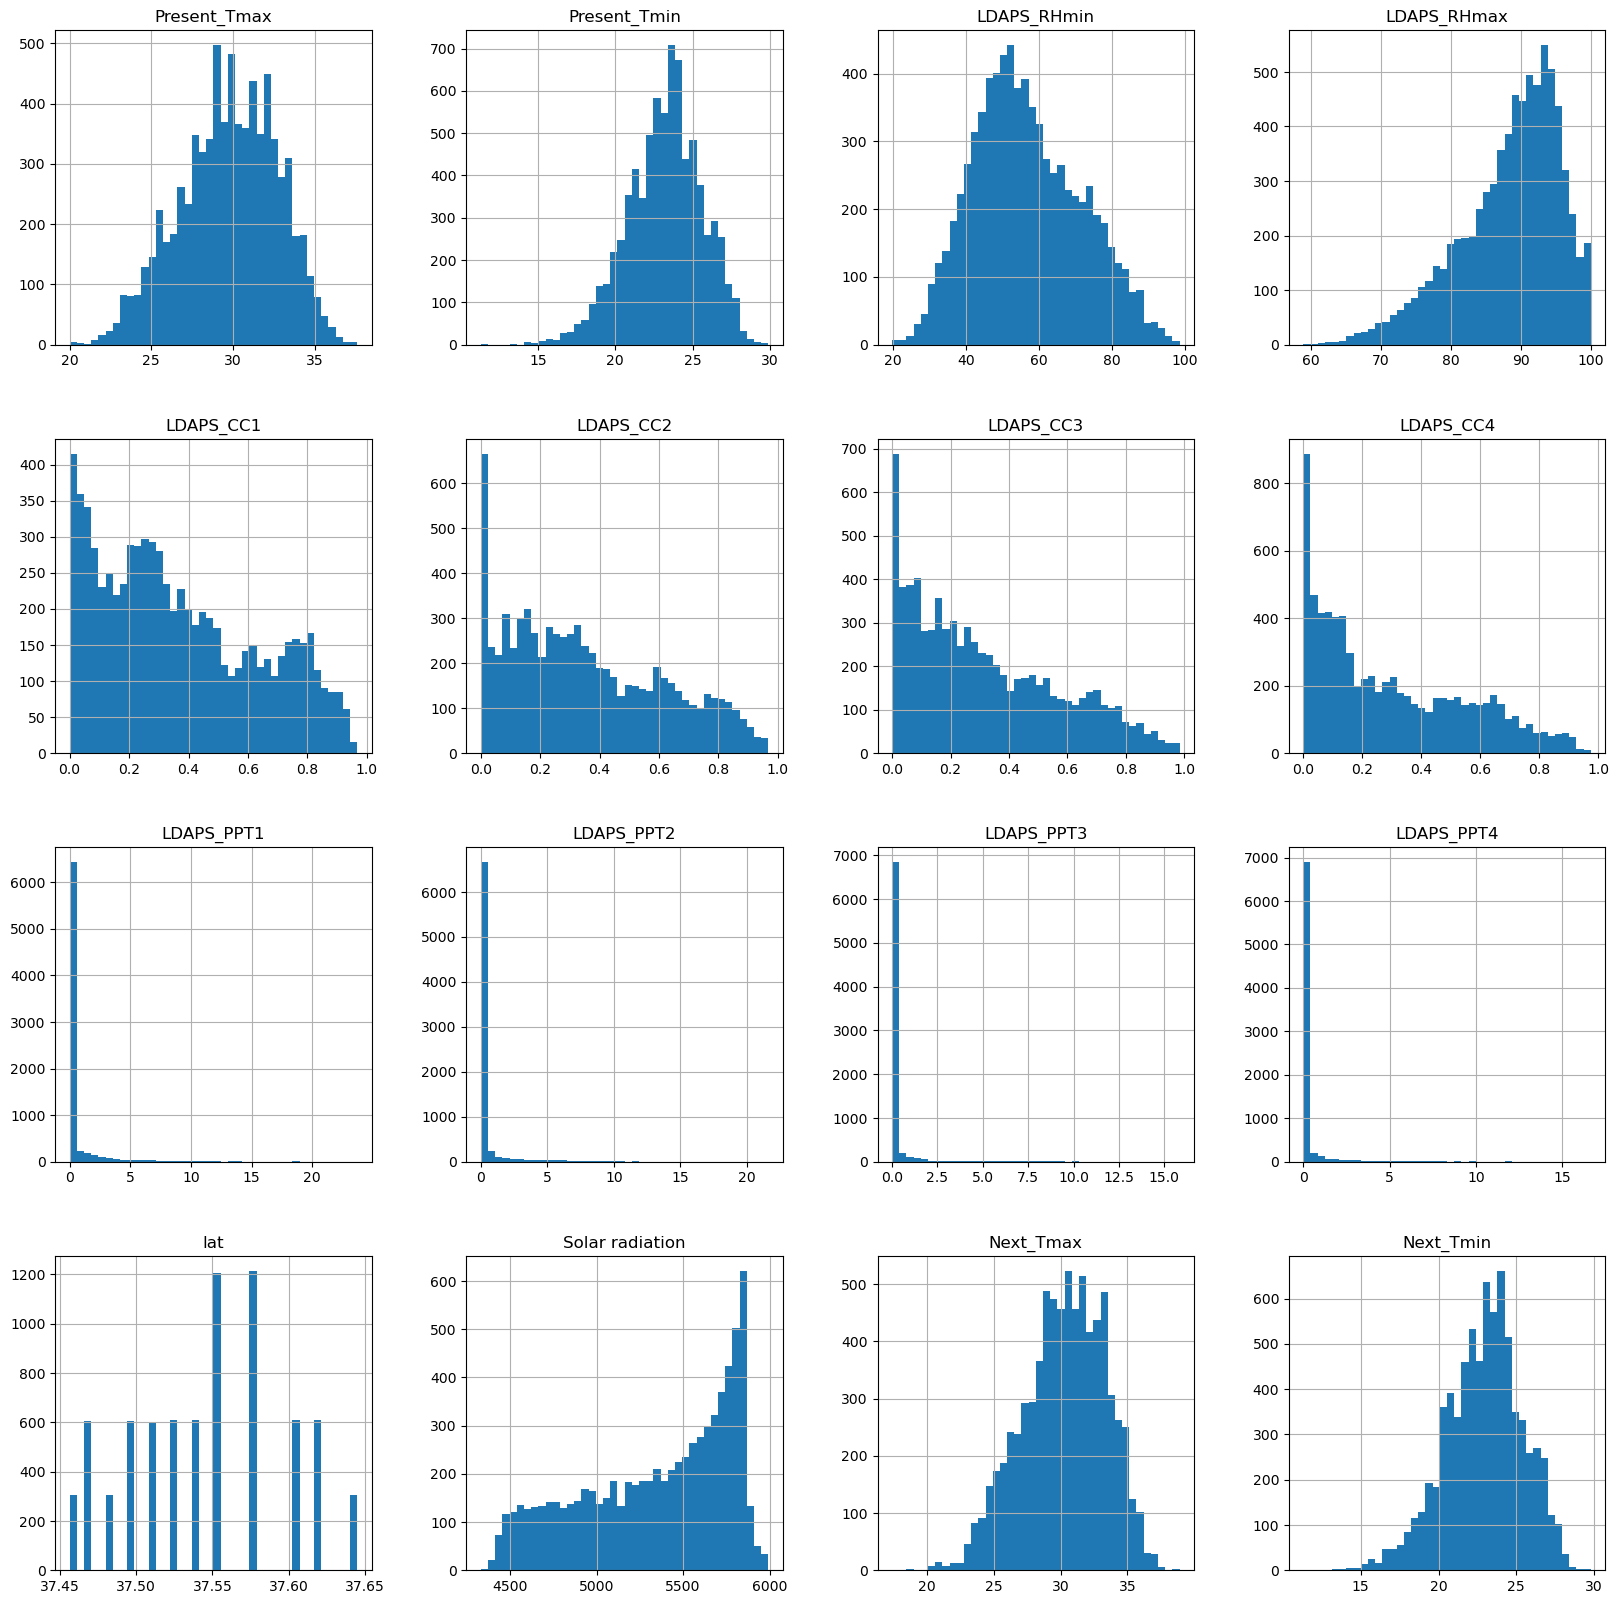

In [39]:
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 40)

**Checking for and Removing the Outliers**

In [40]:
numerical_columns = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']


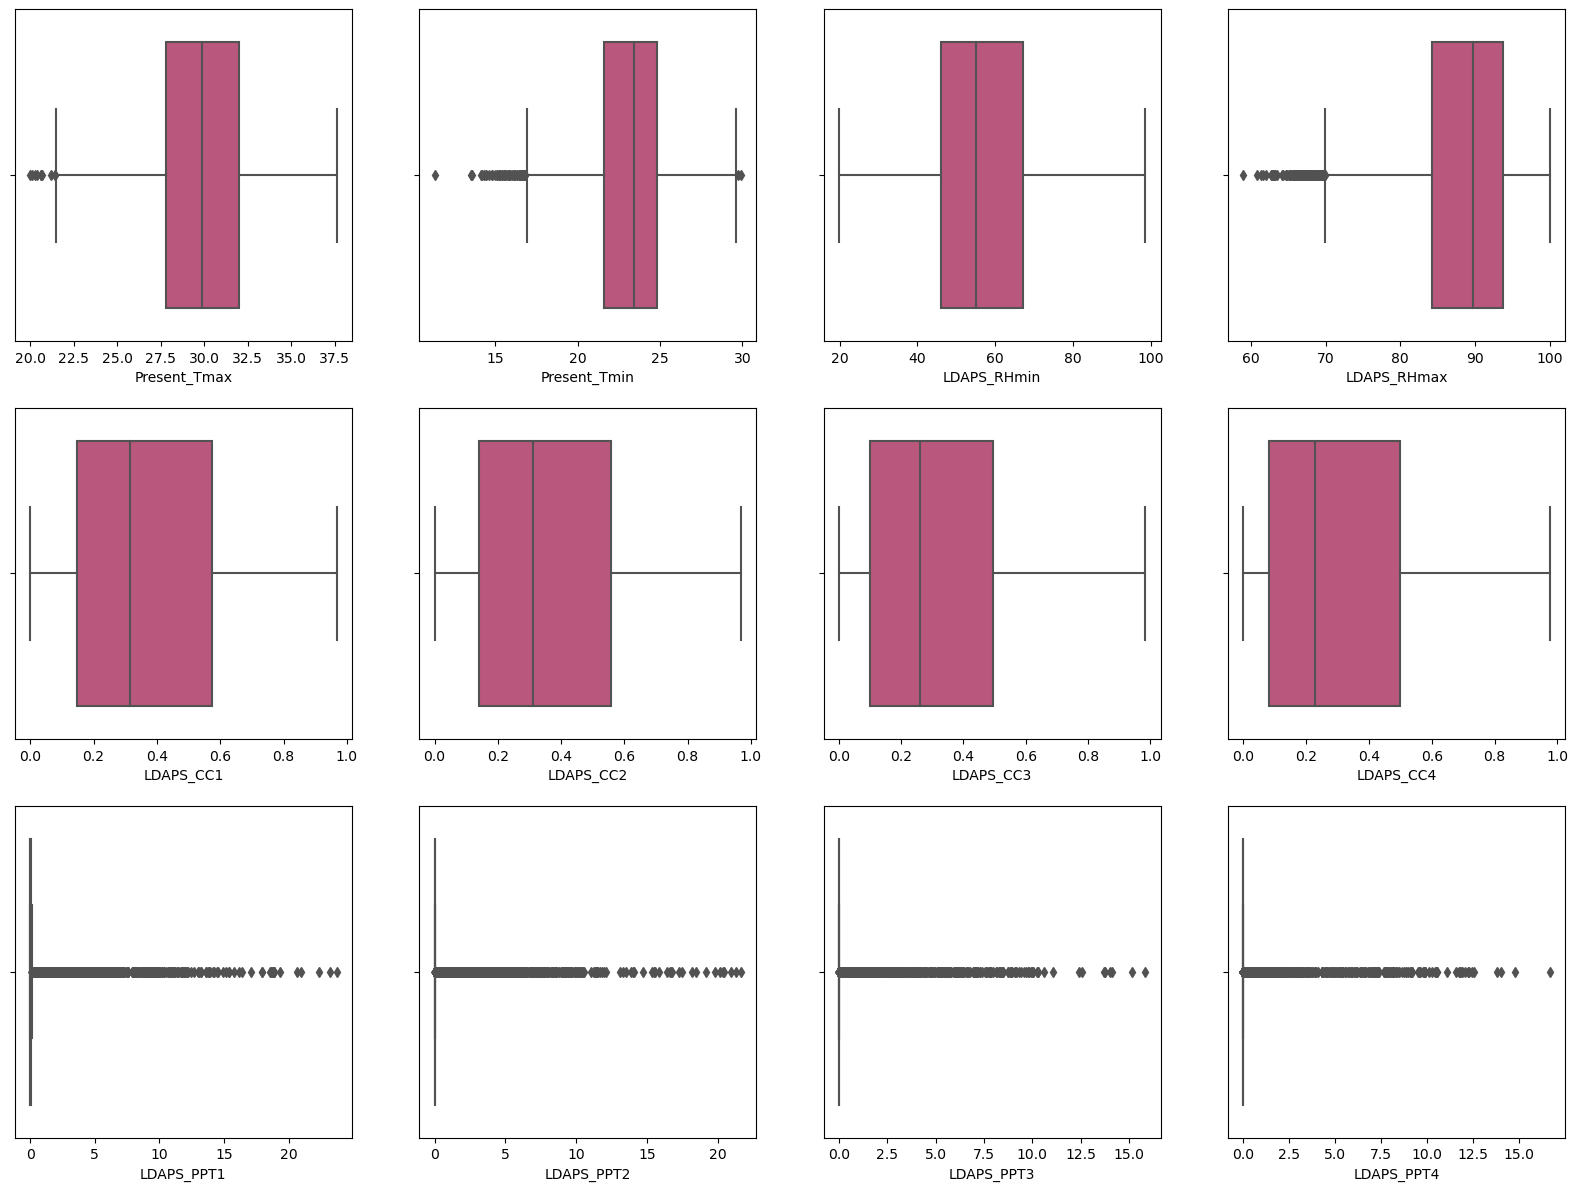

In [41]:
# Lets check the Outliers using plotting boxplot.
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette = "plasma_r")
        plt.xlabel(i)
    p+=1   
plt.show()

In [42]:
z=np.abs(zscore(df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']]))
print(np.where(z>4))

(array([  25,   26,   27,   28,   29,   35,   36,   37,   39,   41,   43,
         44,   45,   49,  150,  151,  152,  153,  154,  155,  156,  157,
        159,  160,  161,  162,  163,  164,  165,  166,  167,  168,  169,
        170,  171,  172,  173,  174,  280,  281,  282,  286,  288,  290,
        296,  297,  301,  302,  302,  304,  304,  305,  306,  306,  307,
        310,  310,  312,  312,  314,  314,  318,  318,  320,  321,  322,
        323,  325,  326,  328,  338,  340,  341,  350,  520,  520,  521,
        522,  523,  523,  524,  525,  526,  526,  527,  527,  528,  528,
        529,  529,  530,  531,  531,  532,  533,  533,  534,  534,  535,
        536,  537,  538,  538,  539,  539,  540,  541,  542,  542,  543,
        543,  544,  544,  988,  989,  990,  991,  993,  994,  995,  997,
        998,  999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008,
       1010, 1012, 1185, 1186, 1187, 1189, 1190, 1191, 1192, 1193, 1194,
       1195, 1196, 1197, 1198, 1199, 1200, 1201, 1

In [43]:
# Definining and removing_outliers
def remove_outliers(df):
    z_scores = stats.zscore(df)
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    df_no_outliers = df[filtered_entries]
    return df_no_outliers

In [44]:
df1 = remove_outliers(df)

print("Shape of the dataframe before removing outliers: ", df.shape)
print("Shape of the dataframe after removing outliers: ", df1.shape)
print("Percentage of data loss post outlier removal: ", (df.shape[0] - df1.shape[0]) / df.shape[0] * 100)

Shape of the dataframe before removing outliers:  (7588, 16)
Shape of the dataframe after removing outliers:  (6869, 16)
Percentage of data loss post outlier removal:  9.475487612018977


In [45]:
df.shape

(7588, 16)

**Checking for and Handling Skewness**

In [46]:
df.skew()

Present_Tmax      -0.257069
Present_Tmin      -0.353822
LDAPS_RHmin        0.301396
LDAPS_RHmax       -0.845264
LDAPS_CC1          0.456716
LDAPS_CC2          0.473929
LDAPS_CC3          0.639649
LDAPS_CC4          0.663815
LDAPS_PPT1         5.305906
LDAPS_PPT2         5.710360
LDAPS_PPT3         6.356670
LDAPS_PPT4         6.681256
lat                0.085377
Solar radiation   -0.524325
Next_Tmax         -0.334842
Next_Tmin         -0.393662
dtype: float64

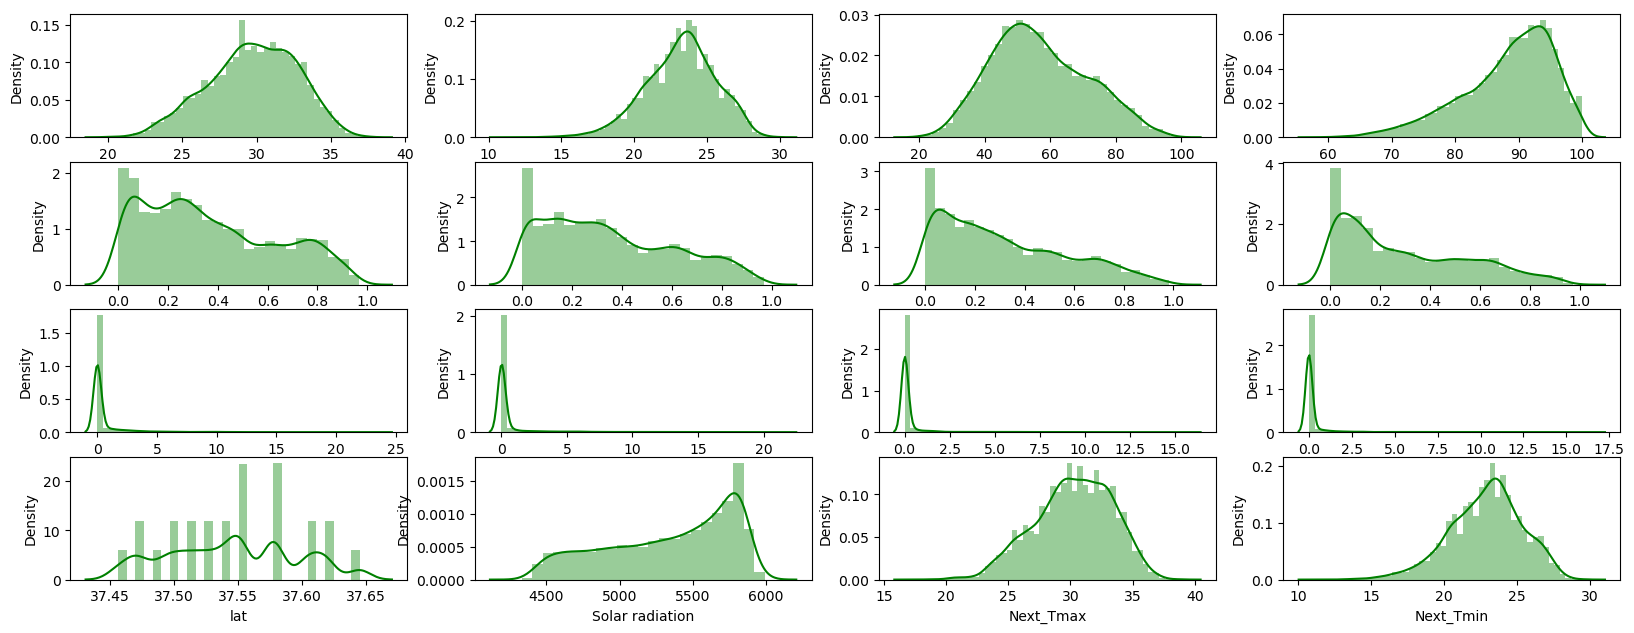

In [47]:
plt.figure(figsize=(20,15))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [48]:
df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']]


,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,23.1,17.8,24.688997,78.261383,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,4456.024414,27.6,17.7
7584,22.5,17.4,30.094858,83.690018,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,4441.803711,28.0,17.1
7585,23.3,17.1,26.741310,78.869858,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,4443.313965,28.3,18.1
7586,23.3,17.7,24.040634,77.294975,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,4438.373535,28.6,18.8


In [49]:
# Cheking again for skewness
df.skew()

Present_Tmax      -0.257069
Present_Tmin      -0.353822
LDAPS_RHmin        0.301396
LDAPS_RHmax       -0.845264
LDAPS_CC1          0.456716
LDAPS_CC2          0.473929
LDAPS_CC3          0.639649
LDAPS_CC4          0.663815
LDAPS_PPT1         5.305906
LDAPS_PPT2         5.710360
LDAPS_PPT3         6.356670
LDAPS_PPT4         6.681256
lat                0.085377
Solar radiation   -0.524325
Next_Tmax         -0.334842
Next_Tmin         -0.393662
dtype: float64

In [50]:
#checking the null values
df.isnull().sum()

Present_Tmax       0
Present_Tmin       0
LDAPS_RHmin        0
LDAPS_RHmax        0
LDAPS_CC1          0
LDAPS_CC2          0
LDAPS_CC3          0
LDAPS_CC4          0
LDAPS_PPT1         0
LDAPS_PPT2         0
LDAPS_PPT3         0
LDAPS_PPT4         0
lat                0
Solar radiation    0
Next_Tmax          0
Next_Tmin          0
dtype: int64

In [51]:
df.isnull().sum().sum()

0

In [52]:
df.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,29.748366,23.195809,56.724969,88.360823,0.368510,0.355528,0.317546,0.298268,0.589008,0.480738,0.275007,0.265373,37.544792,5343.724208,30.241526,22.910820
std,2.967401,2.400880,14.626559,7.199456,0.262260,0.257922,0.249833,0.253392,1.927577,1.743327,1.146087,1.179661,0.050428,429.782561,3.111807,2.482256
min,20.000000,11.300000,19.794666,58.936283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,4329.520508,17.400000,11.300000
25%,27.800000,21.600000,45.960243,84.203724,0.146546,0.140324,0.100950,0.081495,0.000000,0.000000,0.000000,0.000000,37.510200,5001.485717,28.200000,21.300000
50%,29.900000,23.400000,55.023199,89.784122,0.315706,0.311676,0.261795,0.227459,0.000000,0.000000,0.000000,0.000000,37.550700,5441.987305,30.400000,23.100000
75%,32.000000,24.800000,67.115099,93.742725,0.574174,0.557164,0.496444,0.498127,0.052594,0.017735,0.007855,0.000017,37.577600,5729.485840,32.600000,24.600000
max,37.600000,29.900000,98.524734,100.000153,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,5992.895996,38.900000,29.800000


**VARIABLE SPLITING INTO TARGET(Y) AND FEATURES(X)**

Let's define our independent variable (X) and dependant/target variab

In [53]:
X = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y_max = df['Next_Tmax']
y_min = df['Next_Tmin']

X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, random_state=42)
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X, y_min, test_size=0.2, random_state=42)

**Feature Scaling**

In [54]:
scaler = StandardScaler()
X_train_max_scaled = scaler.fit_transform(X_train_max)
X_test_max_scaled = scaler.transform(X_test_max)

X_train_min_scaled = scaler.fit_transform(X_train_min)
X_test_min_scaled = scaler.transform(X_test_min)

# The Machine Learning Model Training,Evaluation and Predictions

**RandomForestRegressor**

In [55]:
# Initializing the rf models
model_max_rf = RandomForestRegressor(random_state=42)
model_min_rf = RandomForestRegressor(random_state=42)

In [56]:
# Training the rf models
model_max_rf.fit(X_train_max_scaled, y_train_max)
model_min_rf.fit(X_train_min_scaled, y_train_min)

RandomForestRegressor(random_state=42)

In [57]:
# Making Predictions for rf
y_pred_max_rf = model_max_rf.predict(X_test_max_scaled)
y_pred_min_rf = model_min_rf.predict(X_test_min_scaled)

Maximum Temperature Model - Mean Squared Error: 1.0693788451910413, R2 Score: 0.8864472849683173
Maximum Temperature Model - RMSE: 1.0341077531819598, MAE: 0.738024374176548


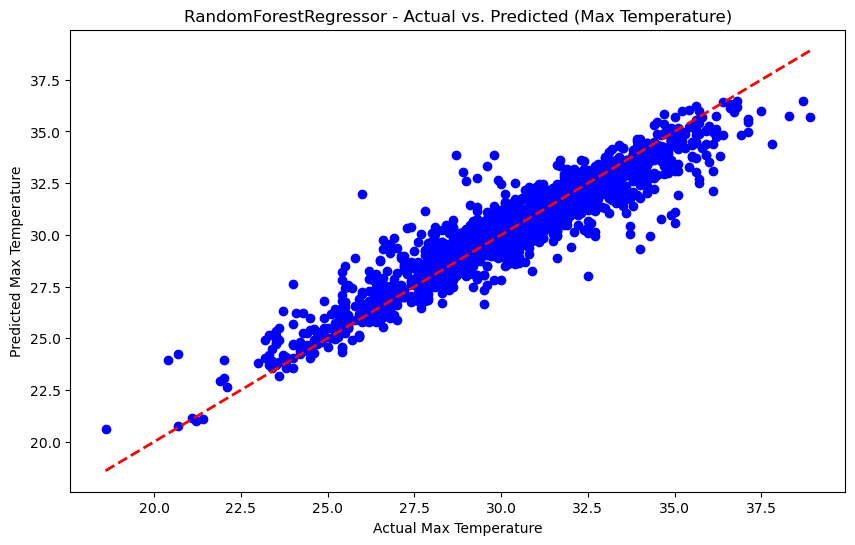

In [58]:
# Evaluation the Maximum Temperature for rf
mse_max = mean_squared_error(y_test_max, y_pred_max_rf)
rmse_max = np.sqrt(mean_squared_error(y_test_max, y_pred_max_rf))
mae_max = mean_absolute_error(y_test_max, y_pred_max_rf)

# Calculate R2 Score for Maximum Temperature with RandomForestRegressor
r2_max = r2_score(y_test_max, y_pred_max_rf)

print(f'Maximum Temperature Model - Mean Squared Error: {mse_max}, R2 Score: {r2_max}')
print(f'Maximum Temperature Model - RMSE: {rmse_max}, MAE: {mae_max}')

# Visualizing the RandomForestRegressor predictions for Maximum Temperature
plt.figure(figsize=(10, 6))
plt.scatter(y_test_max, y_pred_max_rf, color='blue')
plt.plot([min(y_test_max), max(y_test_max)], [min(y_test_max), max(y_test_max)], linestyle='--', color='red', linewidth=2)
plt.title('RandomForestRegressor - Actual vs. Predicted (Max Temperature)')
plt.xlabel('Actual Max Temperature')
plt.ylabel('Predicted Max Temperature')
plt.show()

Minimum Temperature Model - Mean Squared Error: 0.6905337490118573, R2 Score: 0.8875934953126815
Minimum Temperature Model - RMSE: 0.8309836033351424, MAE: 0.6210230566534912


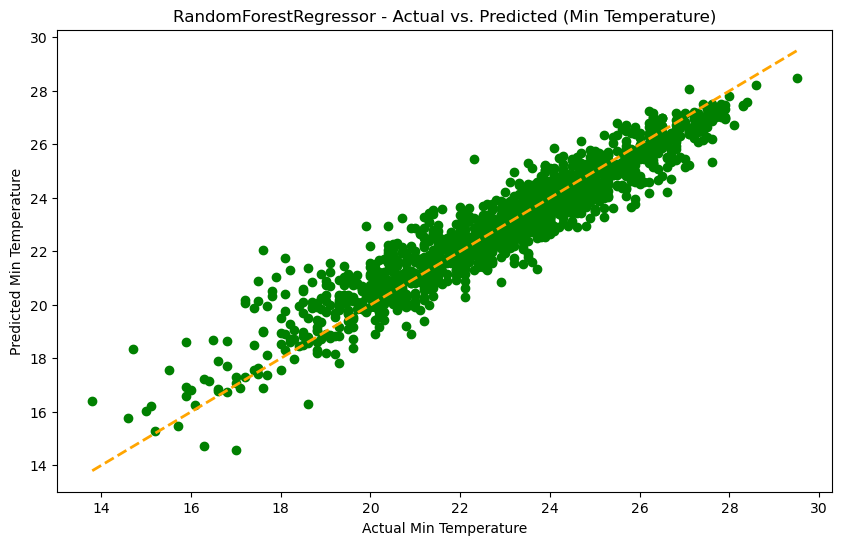

In [59]:
# Evaluation the Minimum Temperature for rf
mse_min = mean_squared_error(y_test_min, y_pred_min_rf)
rmse_min = np.sqrt(mean_squared_error(y_test_min, y_pred_min_rf))
mae_min = mean_absolute_error(y_test_min, y_pred_min_rf)

# Calculate R2 Score for Minimum Temperature with RandomForestRegressor
r2_min = r2_score(y_test_min, y_pred_min_rf)

print(f'Minimum Temperature Model - Mean Squared Error: {mse_min}, R2 Score: {r2_min}')
print(f'Minimum Temperature Model - RMSE: {rmse_min}, MAE: {mae_min}')

# Visualizing the RandomForestRegressor predictions for Minimum Temperature
plt.figure(figsize=(10, 6))
plt.scatter(y_test_min, y_pred_min_rf, color='green')
plt.plot([min(y_test_min), max(y_test_min)], [min(y_test_min), max(y_test_min)], linestyle='--', color='orange', linewidth=2)
plt.title('RandomForestRegressor - Actual vs. Predicted (Min Temperature)')
plt.xlabel('Actual Min Temperature')
plt.ylabel('Predicted Min Temperature')
plt.show()

**Linear Regression**

In [60]:
# Initializing the Linear Regression models
model_linear_max = LinearRegression()
model_linear_min = LinearRegression()

In [61]:
# Train the lr models
model_linear_max.fit(X_train_max_scaled, y_train_max)
model_linear_min.fit(X_train_min_scaled, y_train_min)

LinearRegression()

In [62]:
# Make Predictions for lr
y_pred_linear_max = model_linear_max.predict(X_test_max_scaled)
y_pred_linear_min = model_linear_min.predict(X_test_min_scaled)

Maximum Temperature Model - Mean Squared Error: 3.632768390405909, R2 Score: 0.6142520345648195
Maximum Temperature Model - RMSE: 1.9059822639274242, MAE: 1.4508239594946952


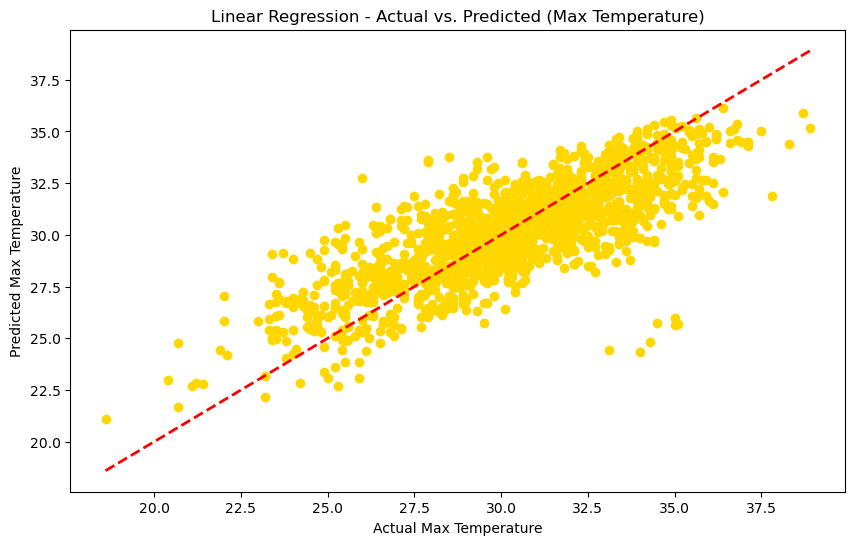

In [63]:
# Evaluation the Maximum Temperature for lr
mse_max = mean_squared_error(y_test_max, y_pred_linear_max)
rmse_max = np.sqrt(mean_squared_error(y_test_max, y_pred_linear_max))
mae_max = mean_absolute_error(y_test_max, y_pred_linear_max)

# Calculate R2 Score for Maximum Temperature with Linear Regressor
r2_max = r2_score(y_test_max, y_pred_linear_max)

print(f'Maximum Temperature Model - Mean Squared Error: {mse_max}, R2 Score: {r2_max}')
print(f'Maximum Temperature Model - RMSE: {rmse_max}, MAE: {mae_max}')

# Visualizing the Linear Regression predictions for Maximum Temperature
plt.figure(figsize=(10, 6))
plt.scatter(y_test_max, y_pred_linear_max, color='gold')
plt.plot([min(y_test_max), max(y_test_max)], [min(y_test_max), max(y_test_max)], linestyle='--', color='red', linewidth=2)
plt.title('Linear Regression - Actual vs. Predicted (Max Temperature)')
plt.xlabel('Actual Max Temperature')
plt.ylabel('Predicted Max Temperature')
plt.show()

Minimum Temperature Model - Mean Squared Error: 1.9549860072780607, R2 Score: 0.6817633546438437
Minimum Temperature Model - RMSE: 1.3982081416148529, MAE: 1.0851273844767524


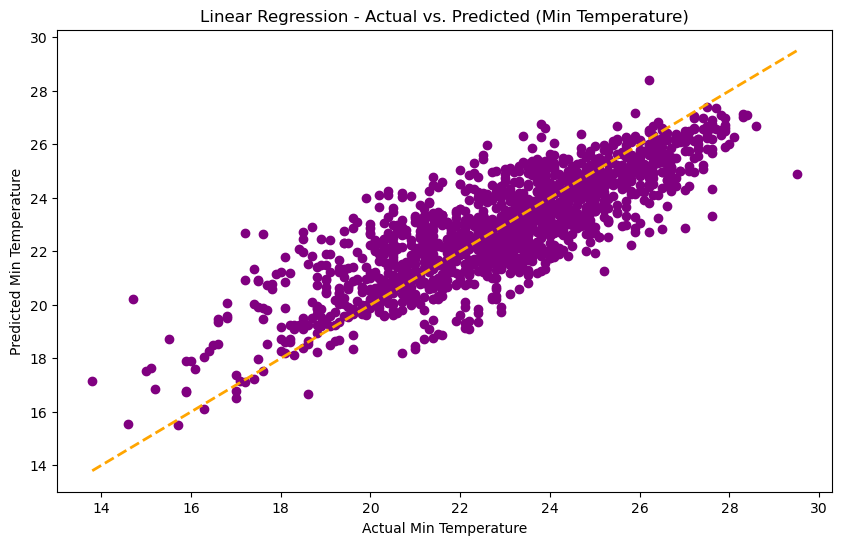

In [64]:
# Evaluation the Minimum Temperature for lr
mse_min = mean_squared_error(y_test_min, y_pred_linear_min)
rmse_min = np.sqrt(mean_squared_error(y_test_min, y_pred_linear_min))
mae_min = mean_absolute_error(y_test_min, y_pred_linear_min)

# Calculate R2 Score for Minimum Temperature with Linear Regressor
r2_min = r2_score(y_test_min, y_pred_linear_min)

print(f'Minimum Temperature Model - Mean Squared Error: {mse_min}, R2 Score: {r2_min}')
print(f'Minimum Temperature Model - RMSE: {rmse_min}, MAE: {mae_min}')

# Visualizing the Linear Regression predictions for Minimum Temperature
plt.figure(figsize=(10, 6))
plt.scatter(y_test_min, y_pred_linear_min, color='purple')
plt.plot([min(y_test_min), max(y_test_min)], [min(y_test_min), max(y_test_min)], linestyle='--', color='orange', linewidth=2)
plt.title('Linear Regression - Actual vs. Predicted (Min Temperature)')
plt.xlabel('Actual Min Temperature')
plt.ylabel('Predicted Min Temperature')
plt.show()

**Support Vector Machine(SVM) Regressor**

In [65]:
# Initializing the SVM models
model_svm_max = SVR()
model_svm_min = SVR()

In [66]:
# Training the SVM models
model_svm_max.fit(X_train_max_scaled, y_train_max)
model_svm_min.fit(X_train_min_scaled, y_train_min)

SVR()

In [67]:
# Make Predictions for SVM
y_pred_svm_max = model_svm_max.predict(X_test_max_scaled)
y_pred_svm_min = model_svm_min.predict(X_test_min_scaled)

Maximum Temperature Model - Mean Squared Error: 2.1510005507896923, R2 Score: 0.7715945535343186
Maximum Temperature Model - RMSE: 1.466628975163689, MAE: 1.0860403449952998


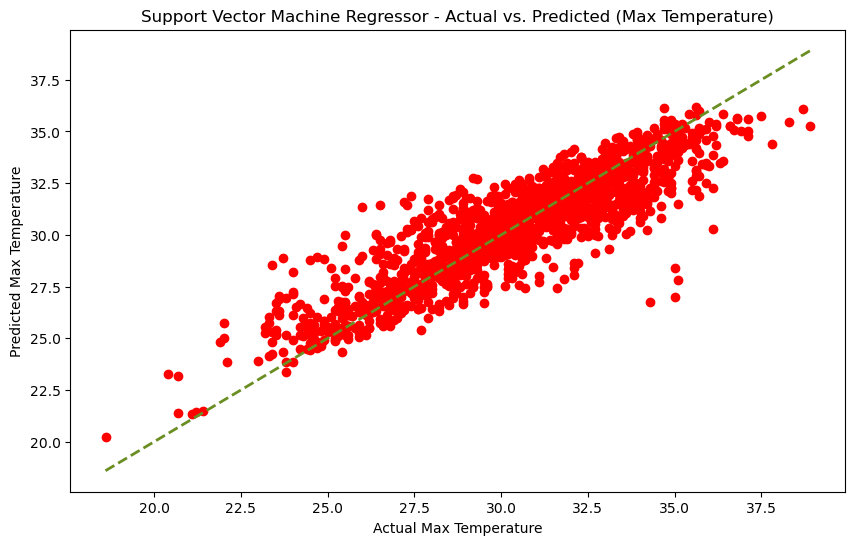

In [68]:
# Evaluation the Maximum Temperature for SVM
mse_max = mean_squared_error(y_test_max, y_pred_svm_max)
rmse_max = np.sqrt(mean_squared_error(y_test_max, y_pred_svm_max))
mae_max = mean_absolute_error(y_test_max, y_pred_svm_max)

# Calculate R2 Score for Maximum Temperature with SVM
r2_max = r2_score(y_test_max, y_pred_svm_max)

print(f'Maximum Temperature Model - Mean Squared Error: {mse_max}, R2 Score: {r2_max}')
print(f'Maximum Temperature Model - RMSE: {rmse_max}, MAE: {mae_max}')

# Visualizing the SVM predictions for Maximum Temperature
plt.figure(figsize=(10, 6))
plt.scatter(y_test_max, y_pred_svm_max, color='red')
plt.plot([min(y_test_max), max(y_test_max)], [min(y_test_max), max(y_test_max)], linestyle='--', color='olivedrab', linewidth=2)
plt.title('Support Vector Machine Regressor - Actual vs. Predicted (Max Temperature)')
plt.xlabel('Actual Max Temperature')
plt.ylabel('Predicted Max Temperature')
plt.show()

Minimum Temperature Model - Mean Squared Error: 1.1571362368367402, R2 Score: 0.8116389821410138
Minimum Temperature Model - RMSE: 1.0757026712046132, MAE: 0.8081183429628911


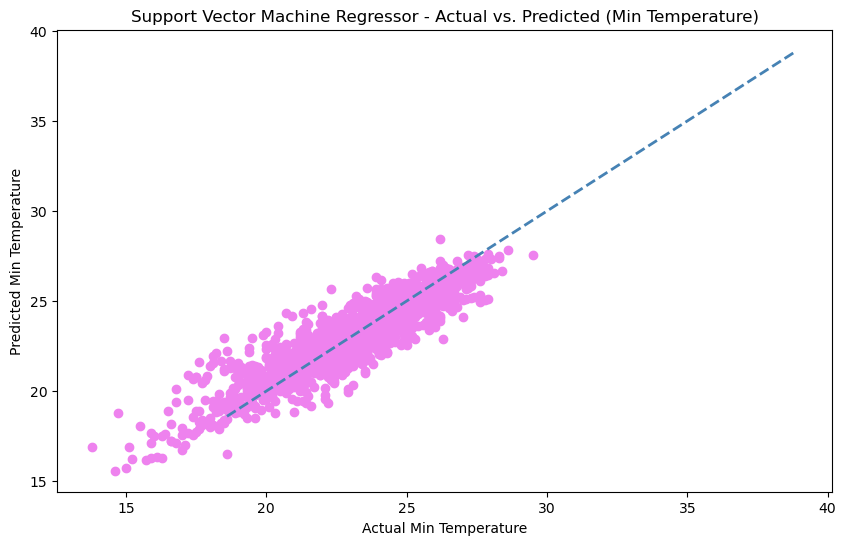

In [69]:
# Evaluation the Minimum Temperature for SVM
mse_min = mean_squared_error(y_test_min, y_pred_svm_min)
rmse_min = np.sqrt(mean_squared_error(y_test_min, y_pred_svm_min))
mae_min = mean_absolute_error(y_test_min, y_pred_svm_min)

# Calculate R2 Score for Minimum Temperature with SVM
r2_min = r2_score(y_test_min, y_pred_svm_min)

print(f'Minimum Temperature Model - Mean Squared Error: {mse_min}, R2 Score: {r2_min}')
print(f'Minimum Temperature Model - RMSE: {rmse_min}, MAE: {mae_min}')

# Visualizing the SVM predictions for Minimum Temperature
plt.figure(figsize=(10, 6))
plt.scatter(y_test_min, y_pred_svm_min, color='violet')
plt.plot([min(y_test_max), max(y_test_max)], [min(y_test_max), max(y_test_max)], linestyle='--', color='steelblue', linewidth=2)
plt.title('Support Vector Machine Regressor - Actual vs. Predicted (Min Temperature)')
plt.xlabel('Actual Min Temperature')
plt.ylabel('Predicted Min Temperature')
plt.show()

**Gradient Boosting Regression**

In [70]:
# Initialize the models
model_gb_max = GradientBoostingRegressor()
model_gb_min = GradientBoostingRegressor()

In [71]:
# Training the gb models
model_gb_max.fit(X_train_max_scaled, y_train_max)
model_gb_min.fit(X_train_min_scaled, y_train_min)

GradientBoostingRegressor()

In [72]:
# Making the gb Predictions
y_pred_gb_max = model_gb_max.predict(X_test_max_scaled)
y_pred_gb_min = model_gb_min.predict(X_test_min_scaled)

Maximum Temperature Model - Mean Squared Error: 2.237144109783183, R2 Score: 0.7624473415334534
Maximum Temperature Model - RMSE: 1.4957085644547146, MAE: 1.156558986365064


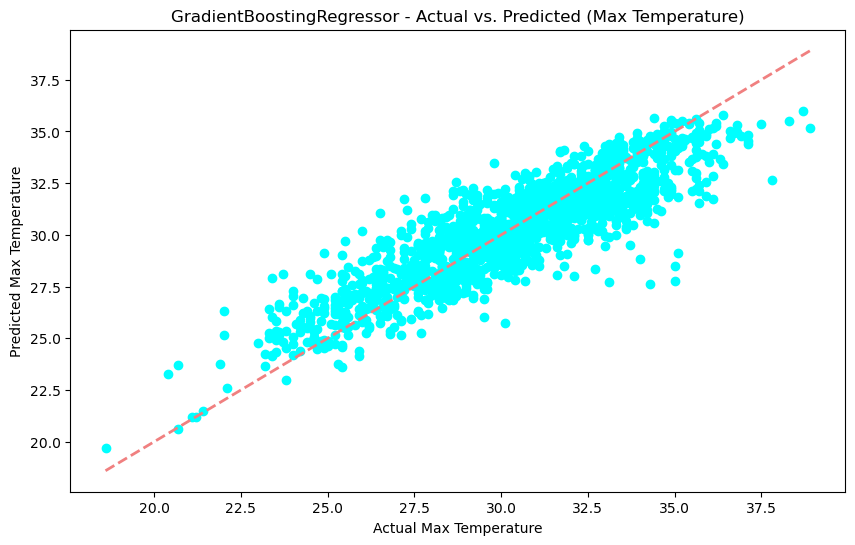

In [73]:
# Evaluation the Maximum Temperature for GradientBoostingRegressor
mse_max = mean_squared_error(y_test_max, y_pred_gb_max)
rmse_max = np.sqrt(mean_squared_error(y_test_max, y_pred_gb_max))
mae_max = mean_absolute_error(y_test_max, y_pred_gb_max)

# Calculate R2 Score for Maximum Temperature with gb
r2_max = r2_score(y_test_max, y_pred_gb_max)

print(f'Maximum Temperature Model - Mean Squared Error: {mse_max}, R2 Score: {r2_max}')
print(f'Maximum Temperature Model - RMSE: {rmse_max}, MAE: {mae_max}')

# Visualizing the gb predictions for Maximum Temperature
plt.figure(figsize=(10, 6))
plt.scatter(y_test_max, y_pred_gb_max, color='cyan')
plt.plot([min(y_test_max), max(y_test_max)], [min(y_test_max), max(y_test_max)], linestyle='--', color='lightcoral', linewidth=2)
plt.title('GradientBoostingRegressor - Actual vs. Predicted (Max Temperature)')
plt.xlabel('Actual Max Temperature')
plt.ylabel('Predicted Max Temperature')
plt.show()

Minimum Temperature Model - Mean Squared Error: 1.2075723153666753, R2 Score: 0.8034288934874211
Minimum Temperature Model - RMSE: 1.098895952930338, MAE: 0.8611548839762222


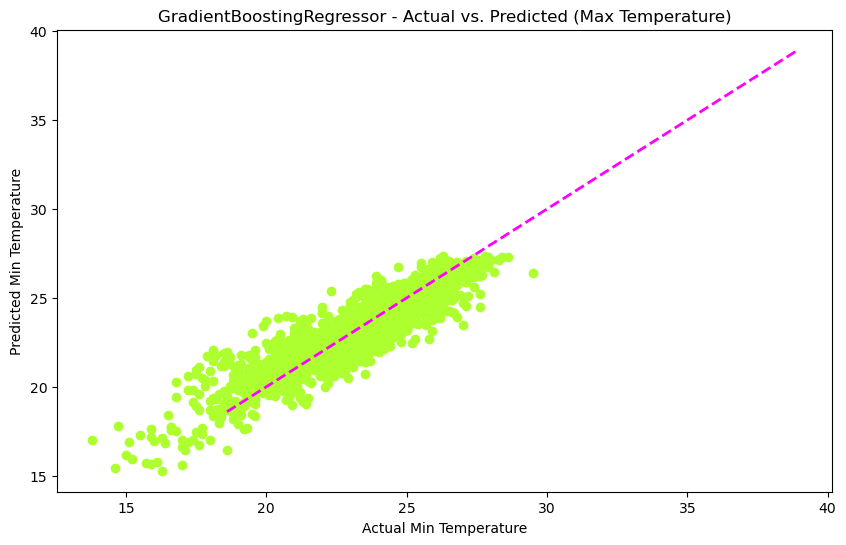

In [74]:
# Evaluation the Minimum Temperature for GradientBoostingRegressor
mse_min = mean_squared_error(y_test_min, y_pred_gb_min)
rmse_min = np.sqrt(mean_squared_error(y_test_min, y_pred_gb_min))
mae_min = mean_absolute_error(y_test_min, y_pred_gb_min)

# Calculate R2 Score for Minimum Temperature with gb
r2_min = r2_score(y_test_min, y_pred_gb_min)

print(f'Minimum Temperature Model - Mean Squared Error: {mse_min}, R2 Score: {r2_min}')
print(f'Minimum Temperature Model - RMSE: {rmse_min}, MAE: {mae_min}')

# Visualizing the gb predictions for Minimum Temperature
plt.figure(figsize=(10, 6))
plt.scatter(y_test_min, y_pred_gb_min, color='greenyellow')
plt.plot([min(y_test_max), max(y_test_max)], [min(y_test_max), max(y_test_max)], linestyle='--', color='fuchsia', linewidth=2)
plt.title('GradientBoostingRegressor - Actual vs. Predicted (Max Temperature)')
plt.xlabel('Actual Min Temperature')
plt.ylabel('Predicted Min Temperature')
plt.show()

**Lasso Regression**

In [75]:
# Initializing the Lasso Regression models
model_lasso_max = Lasso()
model_lasso_min = Lasso()

In [76]:
# Training the Lasso Regression models
model_lasso_max.fit(X_train_max_scaled, y_train_max)
model_lasso_min.fit(X_train_min_scaled, y_train_min)

Lasso()

In [77]:
# Making Predictions for lasso
y_pred_lasso_max = model_lasso_max.predict(X_test_max_scaled)
y_pred_lasso_min = model_lasso_min.predict(X_test_min_scaled)

Maximum Temperature Model - Mean Squared Error: 5.8365316193857, R2 Score: 0.38024394747484336
Maximum Temperature Model - RMSE: 2.415891475084446, MAE: 1.9279572834561785


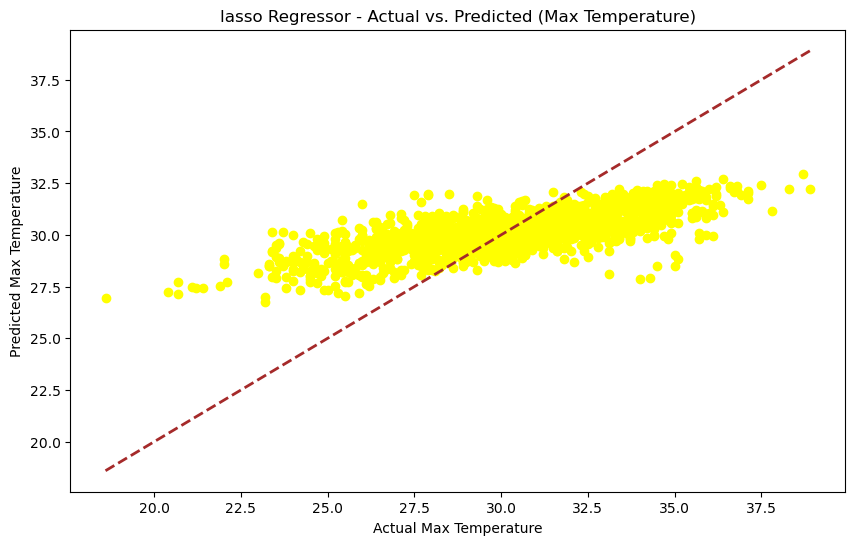

In [78]:
# Evaluation the Maximum Temperature for lasso Regressor
mse_max = mean_squared_error(y_test_max, y_pred_lasso_max)
rmse_max = np.sqrt(mean_squared_error(y_test_max, y_pred_lasso_max))
mae_max = mean_absolute_error(y_test_max, y_pred_lasso_max)

# Calculate R2 Score for Maximum Temperature with lasso
r2_max = r2_score(y_test_max, y_pred_lasso_max)

print(f'Maximum Temperature Model - Mean Squared Error: {mse_max}, R2 Score: {r2_max}')
print(f'Maximum Temperature Model - RMSE: {rmse_max}, MAE: {mae_max}')

# Visualizing the lasso predictions for Maximum Temperature
plt.figure(figsize=(10, 6))
plt.scatter(y_test_max, y_pred_lasso_max, color='yellow')
plt.plot([min(y_test_max), max(y_test_max)], [min(y_test_max), max(y_test_max)], linestyle='--', color='brown', linewidth=2)
plt.title('lasso Regressor - Actual vs. Predicted (Max Temperature)')
plt.xlabel('Actual Max Temperature')
plt.ylabel('Predicted Max Temperature')
plt.show()

Minimum Temperature Model - Mean Squared Error: 3.2781620414041277, R2 Score: 0.46637403689511003
Minimum Temperature Model - RMSE: 1.8105695350922393, MAE: 1.4581802087236557


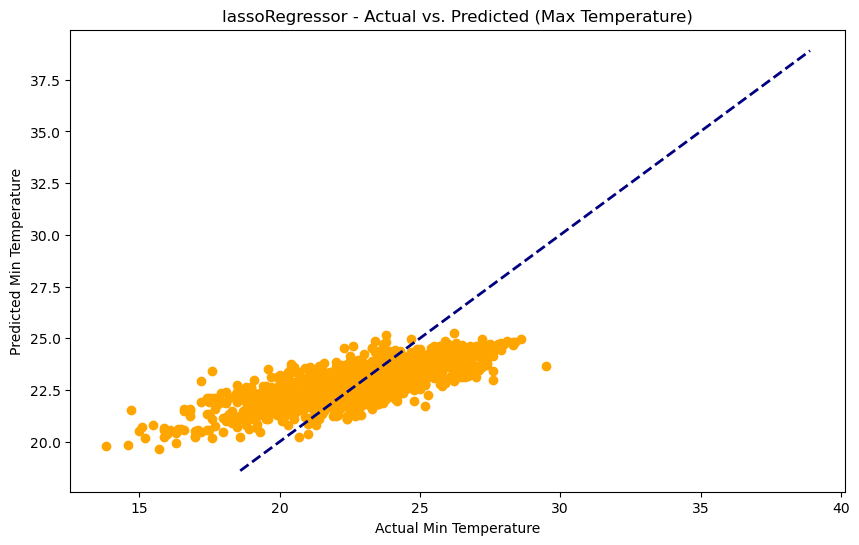

In [79]:
# Evaluation the Minimum Temperature for lassoRegressor
mse_min = mean_squared_error(y_test_min, y_pred_lasso_min)
rmse_min = np.sqrt(mean_squared_error(y_test_min, y_pred_lasso_min))
mae_min = mean_absolute_error(y_test_min, y_pred_lasso_min)

# Calculate R2 Score for Minimum Temperature with lasso
r2_min = r2_score(y_test_min, y_pred_lasso_min)

print(f'Minimum Temperature Model - Mean Squared Error: {mse_min}, R2 Score: {r2_min}')
print(f'Minimum Temperature Model - RMSE: {rmse_min}, MAE: {mae_min}')

# Visualizing the lasso predictions for Minimum Temperature
plt.figure(figsize=(10, 6))
plt.scatter(y_test_min, y_pred_lasso_min, color='orange')
plt.plot([min(y_test_max), max(y_test_max)], [min(y_test_max), max(y_test_max)], linestyle='--', color='navy', linewidth=2)
plt.title('lassoRegressor - Actual vs. Predicted (Max Temperature)')
plt.xlabel('Actual Min Temperature')
plt.ylabel('Predicted Min Temperature')
plt.show()

**Ridge Regression**

In [80]:
# Initializing the Ridge models
model_ridge_max = Ridge()
model_ridge_min = Ridge()

In [81]:
# Training the ridge models
model_ridge_max.fit(X_train_max_scaled, y_train_max)
model_ridge_min.fit(X_train_min_scaled, y_train_min)

Ridge()

In [82]:
# Making Predictions for the ridge model
y_pred_ridge_max = model_ridge_max.predict(X_test_max_scaled)
y_pred_ridge_min = model_ridge_min.predict(X_test_min_scaled)

Maximum Temperature Model - Mean Squared Error: 3.632795329616094, R2 Score: 0.6142491740065887
Maximum Temperature Model - RMSE: 1.9059893309292406, MAE: 1.4508214821350514


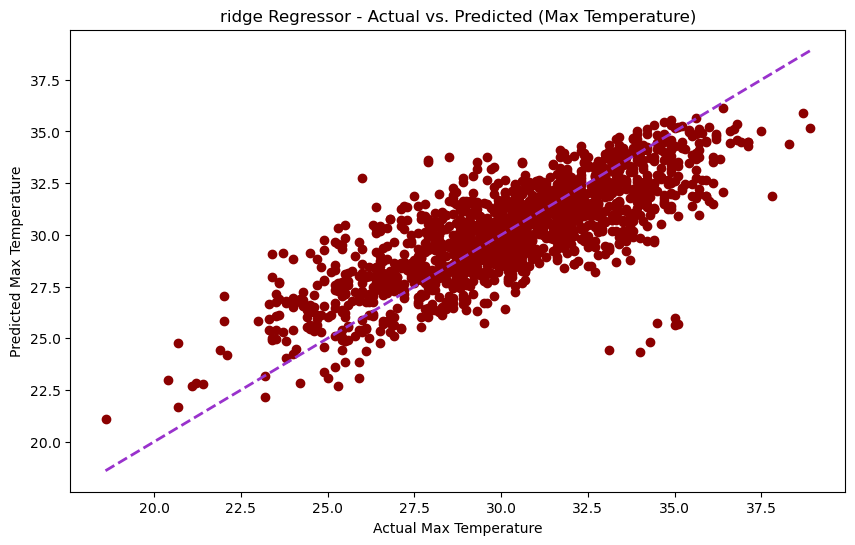

In [83]:
# Evaluation the Maximum Temperature for ridge Regression model
mse_max = mean_squared_error(y_test_max, y_pred_ridge_max)
rmse_max = np.sqrt(mean_squared_error(y_test_max, y_pred_ridge_max))
mae_max = mean_absolute_error(y_test_max, y_pred_ridge_max)

# Calculate R2 Score for Maximum Temperature with ridge regressor
r2_max = r2_score(y_test_max, y_pred_ridge_max)

print(f'Maximum Temperature Model - Mean Squared Error: {mse_max}, R2 Score: {r2_max}')
print(f'Maximum Temperature Model - RMSE: {rmse_max}, MAE: {mae_max}')

# Visualizing the ridge predictions for Maximum Temperature
plt.figure(figsize=(10, 6))
plt.scatter(y_test_max, y_pred_ridge_max, color='darkred')
plt.plot([min(y_test_max), max(y_test_max)], [min(y_test_max), max(y_test_max)], linestyle='--', color='darkorchid', linewidth=2)
plt.title('ridge Regressor - Actual vs. Predicted (Max Temperature)')
plt.xlabel('Actual Max Temperature')
plt.ylabel('Predicted Max Temperature')
plt.show()

Minimum Temperature Model - Mean Squared Error: 1.954985286030599, R2 Score: 0.6817634720499899
Minimum Temperature Model - RMSE: 1.3982078836963403, MAE: 1.0851394171019342


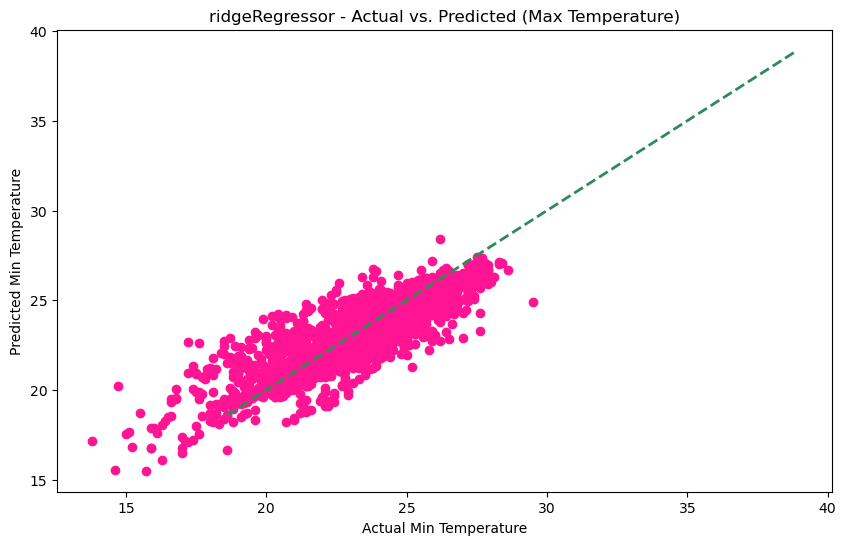

In [84]:
# Evaluation the Minimum Temperature for ridgeRegressor
mse_min = mean_squared_error(y_test_min, y_pred_ridge_min)
rmse_min = np.sqrt(mean_squared_error(y_test_min, y_pred_ridge_min))
mae_min = mean_absolute_error(y_test_min, y_pred_ridge_min)

# Calculate R2 Score for Minimum Temperature with ridge regression
r2_min = r2_score(y_test_min, y_pred_ridge_min)

print(f'Minimum Temperature Model - Mean Squared Error: {mse_min}, R2 Score: {r2_min}')
print(f'Minimum Temperature Model - RMSE: {rmse_min}, MAE: {mae_min}')

# Visualizing the ridge predictions for Minimum Temperature
plt.figure(figsize=(10, 6))
plt.scatter(y_test_min, y_pred_ridge_min, color='deeppink')
plt.plot([min(y_test_max), max(y_test_max)], [min(y_test_max), max(y_test_max)], linestyle='--', color='seagreen', linewidth=2)
plt.title('ridgeRegressor - Actual vs. Predicted (Max Temperature)')
plt.xlabel('Actual Min Temperature')
plt.ylabel('Predicted Min Temperature')
plt.show()

# Summary and Conclusion

Different regression models were tested and found that the **Random Forest Regressor** was the best performer, providing precise predictions with minimal errors. Linear Regression had lower accuracy, while Support Vector Machine and Gradient Boosting Regressors were also effective. Lasso and Ridge Regression had less accurate predictions. In conclusion, Random Forest, SVM, and Gradient Boosting models performed better than Linear Regression, Lasso Regression, and Ridge Regression in this temperature forecast project.